In [1]:
cm2p=1/2.54
using JLD, StatsBase, Statistics
using PyPlot

In [2]:
push!(LOAD_PATH,"./")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "./"

In [3]:
arxcm=load("../JLDFiles/4AP/DatosLFP4APusadosPaper-CM.jld")
arxoriginal=load("../JLDFiles/4AP/DatosLFP4APusadosPaper.jld")

Dict{String,Any} with 4 entries:
  "notacsd"        => "la dCSD fue obtenida directamente, sin planchar gaussian…
  "CSDALindenberg" => Float32[6.71387 5.70679 … 66.1316 -14.4348; -25.8484 -36.…
  "LFP"            => [0.0 2.01416 … 12.085 -8.05664; -8.05664 -10.0708 … 8.056…
  "kCSDCorrecta"   => [0.0 -0.095717 … -0.535431 -0.684494; 0.060564 -0.111223 …

In [4]:
freq=7.022
nmax=size(arxoriginal["LFP"], 3)

1402

In [5]:
cmp=arxcm["CMP"]
cmn=arxcm["CMN"]

Dict{Int64,Array} with 1402 entries:
  306  => [18.5158 60.5818 -119.626]
  1316 => [54.3235 45.6447 -179.691; 35.794 57.3565 -124.538; … ; 33.5338 31.26…
  1333 => [27.4021 61.8322 -181.569; 55.9803 49.2591 -533.781; 40.8768 57.5412 …
  1131 => [37.1333 31.9923 -344.397; 41.9039 58.0326 -310.438; … ; 58.4976 44.3…
  74   => [13.6597 59.5126 -134.674; 4.20614 50.0149 -113.227]
  1265 => [6.27227 55.7186 -88.9118; 44.2241 57.5832 -156.814; 31.9535 61.2759 …
  285  => Array{Int64}(undef,0,3)
  318  => Array{Int64}(undef,0,3)
  1124 => [36.5196 28.5291 -98.8614; 59.3529 36.2107 -196.384; … ; 58.2355 46.5…
  1337 => [53.9054 47.2044 -101.481; 31.3033 61.5601 -193.713; … ; 25.9496 60.7…
  873  => [59.4747 46.5731 -118.613; 25.4261 30.3818 -187.371; … ; 49.1204 53.1…
  1273 => [9.70725 57.7877 -94.8744; 58.2639 44.5528 -118.266; … ; 16.7111 59.7…
  975  => [56.4906 48.0025 -103.212; 29.9968 58.2516 -117.156; … ; 27.5172 61.6…
  354  => [8.93875 51.4699 -121.917; 20.4131 59.6327 -196.138]
  6

In [6]:
postodos=[0 0 0]
for k in keys(cmp)
    postodos=vcat(postodos, cmp[k])
end
postodos=postodos[2:end,:];

negtodos=[0 0 0]
for k in keys(cmn)
    negtodos=vcat(negtodos, cmn[k])
end
negtodos=negtodos[2:end,:];

In [7]:
negtodos[1:20,3]==postodos[1:20,3]

false

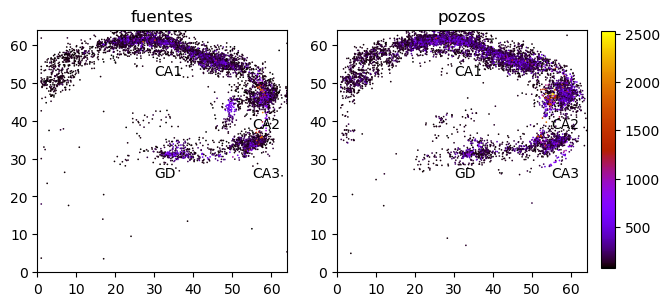

In [15]:
fifi, axx=subplots(1,2,figsize=(2*9*cm2p,8*cm2p))

xxs=postodos[:,1]
yys=postodos[:,2]
ggs=postodos[:,3]
axx[1].set_xticks([0:10:60...])
axx[1].set_yticks([0:10:60...])

bubu=axx[1].scatter(xxs,yys, s=1.5,
    c=ggs, cmap="gnuplot", lw=0)
#colorbar(bubu,ax=axx[1],fraction=0.045, aspect=30)
axx[1].axis([0,64, 0,64] ,aspect="equal")

axx[1].annotate("GD", xy=(30,25), fontsize=10)
axx[1].annotate("CA3", xy=(55,25), fontsize=10)
axx[1].annotate("CA2", xy=(55,38), fontsize=10)
axx[1].annotate("CA1", xy=(30,52), fontsize=10)
axx[1].set_title("fuentes")

xxs2=negtodos[:,1]
yys2=negtodos[:,2]
ggs2=abs.(negtodos[:,3])
axx[2].set_xticks([0:10:60...])
axx[2].set_yticks([0:10:60...])

bubu2=axx[2].scatter(xxs2,yys2, s=1.5,
    c=ggs2, cmap="gnuplot", lw=0)
axx[2].axis([0,64, 0,64] ,aspect="equal")

axx[2].annotate("GD", xy=(30,25), fontsize=10)
axx[2].annotate("CA3", xy=(55,25), fontsize=10)
axx[2].annotate("CA2", xy=(55,38), fontsize=10)
axx[2].annotate("CA1", xy=(30,52), fontsize=10)

axx[2].set_title("pozos")

cbaxes = fifi.add_axes([0.92, 0.125, 0.02, 0.75]) 
colorbar(bubu2,cax=cbaxes,fraction=1, aspect=40)

savefig("DistribicionEspacialCM-4AP.png", dpi=90)

savefig("DistribicionEspacialCM-4AP.svg", dpi=90)


In [9]:
cajas=0:50:3250
hpozos=fit(Histogram, ggs2, cajas)
hfuentes=fit(Histogram, ggs, cajas)

Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:50:3250
weights: [0, 489, 1813, 1072, 749, 508, 343, 305, 213, 181  …  5, 0, 1, 0, 0, 0, 0, 0, 1, 0]
closed: left
isdensity: false

In [10]:
cppb=(hpozos.edges[1][2:end]+hpozos.edges[1][1:end-1])/2
cpfb=(hfuentes.edges[1][2:end]+hfuentes.edges[1][1:end-1])/2


25.0:50.0:3225.0

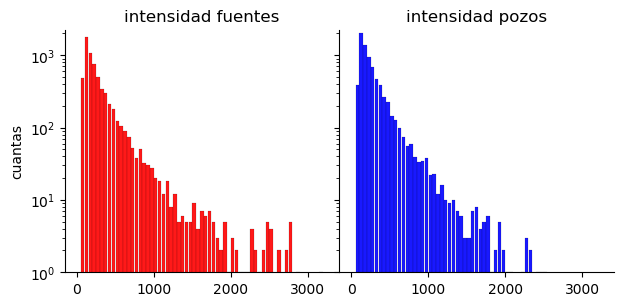

In [16]:
fifi, ax=subplots(1,2,figsize=(2*9*cm2p,8*cm2p), sharey=true)
fs=10
ancho=45
fifi.subplots_adjust(wspace=0)

ax[1].set_title("intensidad fuentes")

#ylabel("Total Count", fontsize=fs)
#ax[1].set_xticks(fontsize=fs)
#ax[1].set_yticks(fontsize=fs)

ax[1].bar(cpfb, hfuentes.weights, ancho, color="red", 
    alpha=0.9, edgecolor="black", lw=0.1)
ax[1].set_ylabel("cuantas")
#ax[1].set_yticks([250:500:2250...])
ax[1].set_ylim(1,2250)
ax[1].set_yscale("log")
ax[1].spines["top"].set_visible(false)
ax[1].spines["right"].set_visible(false)
##----------------------------
ax[2].set_title("intensidad pozos")

#ylabel("Total Count", fontsize=fs)
#ax[2].xticks(fontsize=fs)
#ax[2].yticks(fontsize=fs)

ax[2].bar(cppb, hpozos.weights, ancho, color="blue", 
    alpha=0.9, edgecolor="black", lw=0.1)

#ax[2].set_ylim(1,2250)

#ax[2].set_yscale("log")
#ax[2].set_yticks([])
ax[2].spines["top"].set_visible(false)
ax[2].spines["right"].set_visible(false)

savefig("HistoIntensidadCM-4A.png", dpi=90)

savefig("HistoIntensidadCM-4A.svg", dpi=90)

In [12]:
h2dtantospozos=zeros(Int, 64,64)
h2dtantosfuentes=zeros(Int, 64,64)

h2dintepozos=zeros(Float64, 64,64)
h2dintefuentes=zeros(Float64, 64,64)

ll=size(postodos,1)
nn=size(negtodos, 1)

for l=1:ll
    renglon=round(Int, postodos[l,2])
    columna=round(Int, postodos[l,1])

    h2dtantosfuentes[renglon,columna]+=1
    h2dintefuentes[renglon,columna]+=postodos[l,3]
end


for n=1:nn
    renglon=round(Int, negtodos[n,2])
    columna=round(Int, negtodos[n,1])
    h2dtantospozos[renglon,columna]+=1
    h2dintepozos[renglon,columna]+=abs(negtodos[n,3])
end


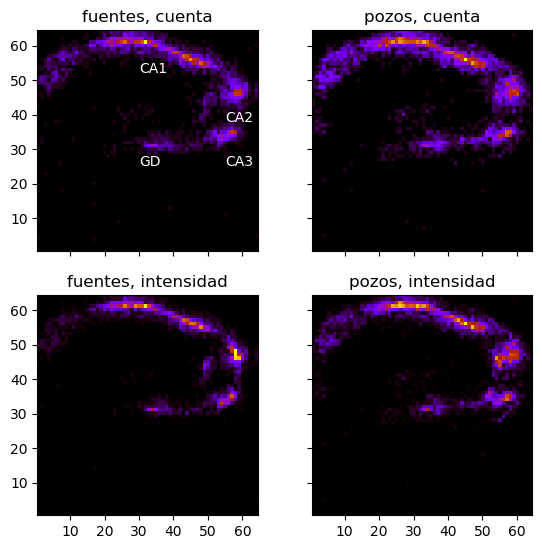

In [17]:
fifi, ax=subplots(2,2,figsize=(2*9*cm2p,2*8*cm2p), sharex=true, sharey=true)

fifi.subplots_adjust(wspace=0.00)


ext=[0.5,64.5,0.5,64.5]


for j=1:2, k=1:2
    ax[j,k].set_xlim(0.5,64.5)
    ax[j,k].set_ylim(0.5,64.5)
    ax[j,k].set_xticks([10:10:60...]) 
end


ax[1,1].imshow(h2dtantosfuentes, origin="lower",
    extent=ext, cmap="gnuplot")
ax[1,1].set_title("fuentes, cuenta")

ax[1,2].imshow(h2dtantospozos, origin="lower",
    extent=ext, cmap="gnuplot")
ax[1,2].set_title("pozos, cuenta")



ax[2,1].imshow(h2dintefuentes, origin="lower",
    extent=ext, cmap="gnuplot")
ax[2,1].set_title("fuentes, intensidad")

ax[2,2].imshow(h2dintepozos, origin="lower",
    extent=ext, cmap="gnuplot")
ax[2,2].set_title("pozos, intensidad")


ax[1,1].annotate("GD", xy=(30,25), fontsize=10, color="white")
ax[1,1].annotate("CA3", xy=(55,25), fontsize=10, color="white")
ax[1,1].annotate("CA2", xy=(55,38), fontsize=10, color="white")
ax[1,1].annotate("CA1", xy=(30,52), fontsize=10, color="white")

savefig("Histo2D-cuentaintenso-4AP.png", dpi=90)

savefig("Histo2D-cuentaintenso-4AP.svg", dpi=90)

In [14]:
h2dintefuentes

64×64 Array{Float64,2}:
   0.0      0.0       0.0      0.0    …    0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
 111.293    0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0  135.227
   0.0      0.0       0.0      0.0    …    0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0    …    0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0
   0.0      0.0       0.0      0.0         0.0    0.0   0.0     0.0    0.0